# Libraries for Neural Networks - PyTorch



In [5]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8 MB 20 kB/s 
     |████████████████████████████████| 6.6 MB 44.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.5.0+cu101 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.5.0+cu101 which

## Loading the dataset

In [6]:
import torch
torch.__version__

'1.5.0+cu101'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [8]:
breast = datasets.load_breast_cancer()

In [9]:
breast.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
inputs = breast.data
inputs.shape

(569, 30)

In [14]:
outputs = breast.target
outputs.shape

(569,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.25)

In [16]:
X_train.shape

(426, 30)

In [17]:
X_test.shape

(143, 30)

## Data transformation


In [18]:
type(X_train)

numpy.ndarray

In [19]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [20]:
type(X_train)

torch.Tensor

In [21]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [22]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [23]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure

In [24]:
(30 + 1) / 2

15.5

In [25]:
# 30 -> 16 -> 16 -> 1
network = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())

In [26]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [27]:
loss_function = nn.BCELoss()

In [28]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)

In [29]:
epochs = 100
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    #print(inputs)
    #print('-----')
    #print(outputs)
    optimizer.zero_grad()

    predictions = network.forward(inputs) 
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(running_loss / len(train_loader)))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 1 loss: 0.6766512768213139
Epoch: 2 loss: 0.6611403088236965
Epoch: 3 loss: 0.652805611837742
Epoch: 4 loss: 0.6447940953942233
Epoch: 5 loss: 0.6358079924139866
Epoch: 6 loss: 0.6260780269323394
Epoch: 7 loss: 0.613966512125592
Epoch: 8 loss: 0.6004492196925851
Epoch: 9 loss: 0.5836770936500194
Epoch: 10 loss: 0.5654084169587423
Epoch: 11 loss: 0.545619981926541
Epoch: 12 loss: 0.5263085164303003
Epoch: 13 loss: 0.5014619286670241
Epoch: 14 loss: 0.4759651346262111
Epoch: 15 loss: 0.45471994752107664
Epoch: 16 loss: 0.43810115581335024
Epoch: 17 loss: 0.4109457655008449
Epoch: 18 loss: 0.40066572538642
Epoch: 19 loss: 0.3819708387519038
Epoch: 20 loss: 0.3698005374780921
Epoch: 21 loss: 0.36468498651371445
Epoch: 22 loss: 0.33984947308551433
Epoch: 23 loss: 0.3249154222566028
Epoch: 24 loss: 0.3246372650529063
Epoch: 25 loss: 0.32529742184073424
Epoch: 26 loss: 0.31341771053713424
Epoch: 27 loss: 0.29938348503999934
Epoch: 28 loss: 0.3027778136175732
Epoch: 29 loss: 0.289426383

## Evaluate

In [30]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [31]:
X_test.shape

(143, 30)

In [32]:
type(X_test)

numpy.ndarray

In [33]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

torch.Tensor

In [34]:
predictions = network.forward(X_test)
predictions

tensor([[0.1572],
        [0.9327],
        [0.0086],
        [0.0084],
        [0.0084],
        [0.9327],
        [0.0084],
        [0.9327],
        [0.9134],
        [0.0957],
        [0.8170],
        [0.9327],
        [0.9327],
        [0.9326],
        [0.0084],
        [0.8121],
        [0.9327],
        [0.5535],
        [0.1830],
        [0.1811],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.0086],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9323],
        [0.2004],
        [0.9327],
        [0.9326],
        [0.0162],
        [0.0084],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9327],
        [0.9312],
        [0.2554],
        [0.0084],
        [0.9327],
        [0.0084],
        [0.1811],
        [0.0084],
        [0.1811],
        [0.7369],
        [0

In [35]:
predictions = np.array(predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [36]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [37]:
accuracy_score(y_test, predictions)

0.9020979020979021

In [38]:
cm = confusion_matrix(y_test, predictions)
cm

array([[39,  8],
       [ 6, 90]])

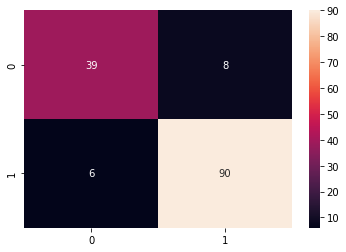

In [39]:
import seaborn as sns
sns.heatmap(cm, annot=True)

**Conclusion: we have 90% accuracy score and can see that 39 were classified correct as benign and 8 wrong as malignant, though it was benign type. Looking at picture down we can see that 90 were classified correctly as malignant and 6 were classified wrong as benign, though it was a malignant type. In general we can see that most breast cancer types were classified correctly. **